In [49]:
import sys
sys.version

'3.9.1 (default, Dec 11 2020, 09:29:25) [MSC v.1916 64 bit (AMD64)]'

In [50]:
import yfinance as yf
yf.pdr_override()
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing

In [51]:
stocks = yf.download("VTI SPY VOO VXUS BND SBUX MSFT AAPL", start="2010-12-31", end="2021-01-29")

[*********************100%***********************]  8 of 8 completed


In [52]:
stocks.head()

Adj Close                                                          \
                 AAPL        BND       MSFT       SBUX         SPY        VOO   
Date                                                                            
2010-12-31   9.937733  60.893539  22.190401  13.611482  103.053917  94.675804   
2011-01-03  10.153707  60.817699  22.246056  14.085956  104.119293  95.563873   
2011-01-04  10.206698  60.825283  22.333513  13.759750  104.061905  95.481636   
2011-01-05  10.290187  60.559765  22.261955  13.704682  104.602806  95.991425   
2011-01-06  10.281872  60.612873  22.913908  13.539465  104.397934  95.826988   

                                Close             ...       Open       \
                  VTI VXUS       AAPL        BND  ...        VTI VXUS   
Date                                              ...                   
2010-12-31  53.566647  NaN  11.520000  80.269997  ...  64.820000  NaN   
2011-01-03  54.119396  NaN  11.770357  80.169998  ...  65.360001  NaN   
2011-01-04  54.012138  NaN  11.831786  80.180000  ...  65.820000  NaN   
2011-01-05  54.309158  NaN  11.928571  79.830002  ...  65.300003  NaN   
2011-01-06  54.185398  NaN  11.918929  79.900002  ...  65.910004  NaN   

               Volume                                                  \
                 AAPL      BND      MSFT      SBUX        SPY     VOO   
Date                                                                    
2010-12-31  193508000   534500  24752000   6346200   91218900  145750   
2011-01-03  445138400   936500  53443800  12764600  138725200  119200   
2011-01-04  309080800  1784100  54405600  13306000  137409700  108350   
2011-01-05  255519600   837300  58998700  11501800  133975300  717750   
2011-01-06  300428800   591000  88026300  13253400  122519000   72450   

                          
                VTI VXUS  
Date                      
2010-12-31  5170800  NaN  
2011-01-03  1465100  NaN  
2011-01-04  1474900  NaN  
2011-01-05  5170700  NaN  
2011-01-06  4318100  NaN  

[5 rows x 48 columns]

In [53]:
adj_close = stocks['Adj Close']
for symbol in adj_close:
    adj_close[symbol] = (adj_close[symbol]/adj_close[symbol].iloc[0] - 1) * 100
adj_close


,AAPL,BND,MSFT,SBUX,SPY,VOO,VTI,VXUS
Date,,,,,,,,
2010-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2011-01-03,2.173271,-0.124545,0.250805,3.485836,1.033805,0.938011,1.031891,NaN
2011-01-04,2.706510,-0.112091,0.644928,1.089291,0.978117,0.851149,0.831659,NaN
2011-01-05,3.546626,-0.548128,0.322456,0.684721,1.502989,1.389606,1.386146,NaN
2011-01-06,3.462954,-0.460913,3.260450,-0.529088,1.304188,1.215922,1.155106,NaN
...,...,...,...,...,...,...,...,...
2021-01-22,1299.413846,43.496335,918.233047,663.399652,271.533675,271.689469,275.028142,NaN
2021-01-25,1338.154985,43.824784,934.366157,660.020103,272.998937,273.199879,276.092251,NaN
2021-01-26,1340.570078,43.808359,946.984239,669.130099,272.416712,272.640075,274.729442,NaN


<AxesSubplot:xlabel='Date'>

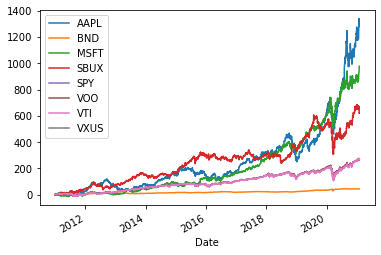

In [54]:
adj_close.plot.line()